In [64]:
import torch

In [65]:
torch.__version__

'1.10.2'

torch: 텐서를 생성하는 라이브러리

torch.autograd: 자동미분 기능을 제공하는 라이브러리

torch.nn: 신경망을 생성하는 라이브러리

torch.multiprocessing: 병럴처리 기능을 제공하는 라이브러리

torch.utils: 데이터 조작 등 유틸리티 기능 제공

torch.legacy(./nn/.optim): Torch로부터 포팅해온 코드

torch.onnx: ONNX(Open Neural Network Exchange)

서로 다른 프레임워크 간의 모델을 공유할 때 사용

in-place 방식

(참고) in-place 방식

in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
x.copy_(y), x.t_()

torch.sub : 뺄셈

torch.mul : 곱셉

torch.div : 나눗셈

torch.mm : 내적(dot product)

cat

텐서를 결합하는 메소드(concatenate)

넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야함

예를 들어, 해당 차원을 늘려준 후 결합

chuck
텐서를 여러 개로 나눌 때 사용

몇 개의 텐서로 나눌 것이냐

split
chunck와 동일한 기능이지만 조금 다름

하나의 텐서당 크기가 얼마이냐

torch ↔ numpy
Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

numpy()
from_numpy()
(참고)

Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

CUDA Tensors
.to 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
예) cpu, gpu

In [66]:
x = torch.empty(4,2)
print(x)

tensor([[1.6617e+22, 1.3410e-08],
        [2.1589e-04, 1.7282e-04],
        [1.0314e-08, 2.6080e+20],
        [1.0325e-08, 8.1808e+20]])


In [67]:
x = torch.rand(4,2)
print(x)

tensor([[0.5599, 0.8700],
        [0.3473, 0.1824],
        [0.8578, 0.9275],
        [0.0186, 0.2136]])


In [68]:
x = torch.zeros(4,2, dtype = torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [69]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [70]:
x = x.new_ones(2,4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [71]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.7412,  0.3993, -0.5338,  0.2613],
        [-1.5857, -0.1318,  0.5631, -1.6443]])


In [72]:
print(x.size())

torch.Size([2, 4])


In [73]:
print(x)

tensor([[-0.7412,  0.3993, -0.5338,  0.2613],
        [-1.5857, -0.1318,  0.5631, -1.6443]])


In [74]:
y = torch.rand(2,4)
print(y)
print(x+y)

tensor([[0.8279, 0.1551, 0.9449, 0.0719],
        [0.6359, 0.5129, 0.3167, 0.8218]])
tensor([[ 0.0867,  0.5545,  0.4111,  0.3332],
        [-0.9498,  0.3811,  0.8798, -0.8225]])


In [75]:
print(torch.add(x,y))

tensor([[ 0.0867,  0.5545,  0.4111,  0.3332],
        [-0.9498,  0.3811,  0.8798, -0.8225]])


In [76]:
result = torch.empty(2,4)
torch.add(x,y,out=result)

tensor([[ 0.0867,  0.5545,  0.4111,  0.3332],
        [-0.9498,  0.3811,  0.8798, -0.8225]])

In [77]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[-0.7412,  0.3993, -0.5338,  0.2613],
        [-1.5857, -0.1318,  0.5631, -1.6443]])
tensor([[0.8279, 0.1551, 0.9449, 0.0719],
        [0.6359, 0.5129, 0.3167, 0.8218]])
tensor([[ 0.0867,  0.5545,  0.4111,  0.3332],
        [-0.9498,  0.3811,  0.8798, -0.8225]])


In [78]:
x = torch.Tensor([[1,3], [5,7]])
y = torch.Tensor([[2,4], [6,8]])

print(x-y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [79]:
x = torch.Tensor([[1,3], [5,7]])
y = torch.Tensor([[2,4], [6,8]])

print(x*y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [80]:
x = torch.Tensor([[1,3], [5,7]])
y = torch.Tensor([[2,4], [6,8]])

print(x/y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [81]:
x = torch.Tensor([[1,3], 
                  [5,7]])
y = torch.Tensor([[2,4], 
                  [6,8]])

print(torch.mm(x,y))

tensor([[20., 28.],
        [52., 76.]])


In [82]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [83]:
print(x[:,1])

tensor([3., 7.])


In [86]:
x = torch.randn(4,5)
y=x.view(20)
z = x.view(5,-1)

print(x)
print(y)
print(z)

tensor([[ 0.1565,  0.4090, -0.4600,  0.6496,  0.4726],
        [-0.8922, -0.8797,  0.9293,  0.9955,  0.7039],
        [-0.3733, -0.2916, -0.6643,  0.6327, -1.5648],
        [-0.1592,  1.6978,  0.6029,  0.5820,  0.2449]])
tensor([ 0.1565,  0.4090, -0.4600,  0.6496,  0.4726, -0.8922, -0.8797,  0.9293,
         0.9955,  0.7039, -0.3733, -0.2916, -0.6643,  0.6327, -1.5648, -0.1592,
         1.6978,  0.6029,  0.5820,  0.2449])
tensor([[ 0.1565,  0.4090, -0.4600,  0.6496],
        [ 0.4726, -0.8922, -0.8797,  0.9293],
        [ 0.9955,  0.7039, -0.3733, -0.2916],
        [-0.6643,  0.6327, -1.5648, -0.1592],
        [ 1.6978,  0.6029,  0.5820,  0.2449]])


In [91]:
x = torch.randn(2,6)
y = x.view(12)
z = x.view(6,-1)

print(x)
print(y)
print(z)

tensor([[-0.2698, -1.9952,  0.3617, -0.1550, -0.7448,  0.4165],
        [ 1.2267,  0.0755,  0.6679,  0.7181, -0.8914, -0.5050]])
tensor([-0.2698, -1.9952,  0.3617, -0.1550, -0.7448,  0.4165,  1.2267,  0.0755,
         0.6679,  0.7181, -0.8914, -0.5050])
tensor([[-0.2698, -1.9952],
        [ 0.3617, -0.1550],
        [-0.7448,  0.4165],
        [ 1.2267,  0.0755],
        [ 0.6679,  0.7181],
        [-0.8914, -0.5050]])


In [92]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-1.4131])
-1.413074254989624
torch.float32


In [93]:
x = torch.randn(2)
print(x)
print(x.item())
print(x.dtype)

tensor([0.7899, 1.4628])


ValueError: only one element tensors can be converted to Python scalars

In [98]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.6714, 0.4944, 0.7912],
         [0.2659, 0.4899, 0.9230],
         [0.4763, 0.9246, 0.0860]]])
torch.Size([1, 3, 3])


In [99]:
t = tensor.squeeze()

print(t)
print(t.shape)

tensor([[0.6714, 0.4944, 0.7912],
        [0.2659, 0.4899, 0.9230],
        [0.4763, 0.9246, 0.0860]])
torch.Size([3, 3])


In [100]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.4298, 0.9251, 0.0586],
         [0.9350, 0.3648, 0.3734],
         [0.0673, 0.1777, 0.4269]]])
torch.Size([1, 3, 3])


In [101]:
t = tensor.unsqueeze(dim=0)
print(t)
print(t.shape)

tensor([[[[0.4298, 0.9251, 0.0586],
          [0.9350, 0.3648, 0.3734],
          [0.0673, 0.1777, 0.4269]]]])
torch.Size([1, 1, 3, 3])


In [103]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

print(torch.stack([x,y,z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [104]:
a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)
c = torch.cat((a,b), dim=0)

print(c)
print(c.size())

tensor([[[[ 0.6465,  0.7555, -0.5896],
          [ 0.5818, -1.0979, -0.6807],
          [-1.5646,  1.3062,  0.8961]]],


        [[[-2.7185,  0.9989,  0.1838],
          [ 1.3020,  0.4596,  0.8197],
          [-0.3731, -1.1047, -0.6372]]]])
torch.Size([2, 1, 3, 3])


In [106]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b), dim=2)

print(c)
print(c.size())

tensor([[[-0.8106,  0.9957,  0.0190,  0.2702,  1.0124, -0.9508],
         [ 0.2887, -0.7211, -0.4020, -0.0310,  0.8894,  1.7163],
         [ 0.5416,  0.6982,  2.0842, -0.6108,  0.2726,  1.9544]]])
torch.Size([1, 3, 6])


In [107]:
tensor = torch.rand(3,6)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.3832, 0.5749, 0.2571, 0.0014, 0.8218, 0.4432],
        [0.4073, 0.7928, 0.8860, 0.9520, 0.8819, 0.8067],
        [0.9241, 0.4381, 0.9427, 0.6359, 0.9762, 0.4414]])
tensor([[0.3832, 0.5749],
        [0.4073, 0.7928],
        [0.9241, 0.4381]])
tensor([[0.2571, 0.0014],
        [0.8860, 0.9520],
        [0.9427, 0.6359]])
tensor([[0.8218, 0.4432],
        [0.8819, 0.8067],
        [0.9762, 0.4414]])


In [108]:
tensor = torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.8755, 0.9437, 0.5372, 0.5892, 0.7053, 0.4073],
        [0.7757, 0.9668, 0.9659, 0.1759, 0.8524, 0.1988],
        [0.4685, 0.1549, 0.8892, 0.5719, 0.3622, 0.9295]])
tensor([[0.8755, 0.9437, 0.5372],
        [0.7757, 0.9668, 0.9659],
        [0.4685, 0.1549, 0.8892]])
tensor([[0.5892, 0.7053, 0.4073],
        [0.1759, 0.8524, 0.1988],
        [0.5719, 0.3622, 0.9295]])


In [109]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [110]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [111]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [113]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


In [114]:
import torch

In [115]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.3408])
0.3407963514328003
torch.float32


In [116]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y
print(device)
print(z)
print(z.to ('cpu', torch.double))

cuda
tensor([1.3408], device='cuda:0')
tensor([1.3408], dtype=torch.float64)


AUTOGRAD (자동미분)
autograd 패키지는 Tensor의 모든 연산에 대해 자동 미분 제공

이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

backprop를 위한 미분값을 자동으로 계산

Tensor
data: tensor형태의 데이터

grad: data가 겨쳐온 layer에 대한 미분값 저장

grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

requires_grad 속성을 True로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

계산이 완료된 후, .backward()를 호출하면 자동으로 gradient를 계산할 수 있으며, .grad 속성에 누적됨

기록을 추적하는 것을 중단하게 하려면, .detach()를 호출하여 연산기록으로부터 분리

기록을 추적하는 것을 방지하기 위해 코드 블럭을 with torch.no_grad():로 감싸면 gradient는 필요없지만, requires_grad=True로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

Autograd 구현에서 매우 중요한 클래스 : Function 클래스

In [117]:
import torch

In [119]:
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [120]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [122]:
print(y.grad_fn)

In [123]:
z = y*y*2
out = z.mean()

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


In [124]:
a = torch.rand(3,3)
a = ((a*3)/(a-1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a*a).sum()
print(b.grad_fn)

False
True


In [125]:
out.backward()

In [126]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [128]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y*2
    
print(y)

tensor([-578.8654, -912.0109, -343.5417], grad_fn=<MulBackward0>)


In [129]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [130]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x **2).requires_grad)

True
True
False


In [132]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


In [ ]:
import torch

In [133]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [135]:
a = torch.ones(2,2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [142]:
print('a.data:',a.data)
print('a.grad:', a.grad)
print('a.grad_fn', a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn None


In [143]:
b = a+2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [144]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [145]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [140]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


In [146]:
print('a.data:',a.data)
print('a.grad:', a.grad)
print('a.grad_fn', a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn None


In [148]:
print('b.data:',b.data)
print('b.grad:', b.grad)
print('b.grad_fn', b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
b.grad: None
b.grad_fn <AddBackward0 object at 0x000001BCD8F02BE0>


In [149]:
print('c.data:',c.data)
print('c.grad:', c.grad)
print('c.grad_fn', c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad_fn <PowBackward0 object at 0x000001BCD8F02730>


C:\ProgramData\Anaconda3\envs\torch-gpu\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


In [150]:
print('out.data:',out.data)
print('out.grad:', out.grad)
print('out.grad_fn', out.grad_fn)

out.data: tensor(36.)
out.grad: None
out.grad_fn <SumBackward0 object at 0x000001BCE1A51AF0>


C:\ProgramData\Anaconda3\envs\torch-gpu\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


In [151]:
x = torch.ones(3, requires_grad=True)
y = (x**2)
z = y**2++x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [152]:
grad = torch.Tensor([0.1,1,100])
z.backward(grad)

In [154]:
print('x.data:',x.data)
print('x.grad:', x.grad)
print('x.grad_fn', x.grad_fn)

x.data: tensor([1., 1., 1.])
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn None


In [155]:
print('y.data:',y.data)
print('y.grad:', y.grad)
print('y.grad_fn', y.grad_fn)

y.data: tensor([1., 1., 1.])
y.grad: None
y.grad_fn <PowBackward0 object at 0x000001BCE1A51A30>


C:\ProgramData\Anaconda3\envs\torch-gpu\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


In [156]:
print('z.data:',z.data)
print('z.grad:', z.grad)
print('z.grad_fn', z.grad_fn)

z.data: tensor([2., 2., 2.])
z.grad: None
z.grad_fn <AddBackward0 object at 0x000001BCD8ED87C0>


C:\ProgramData\Anaconda3\envs\torch-gpu\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


In [157]:
import torch
import torch.nn as nn

In [162]:
m = nn.Conv2d(16,33, 3, stride=2)

m = nn.Conv2d(16, 33,(3,5), stride=(2,1), padding=(4,2))

m = nn.Conv2d(16, 33,(3,5), stride=(2,1), padding=(4,2), dilation=(3,1))

input = torch.randn(20, 16,50,100)
print(input)
output= m(input)
print(output)

tensor([[[[-0.2548, -0.3540, -0.3648,  ...,  0.9542, -0.4462, -0.3640],
          [-0.6602,  0.4372, -0.0783,  ..., -0.8372,  1.2486, -0.1951],
          [-2.7770,  0.6521,  0.9653,  ..., -0.1171,  0.7619,  0.3519],
          ...,
          [ 0.6048,  1.3084,  1.3636,  ...,  1.0850,  0.1990,  0.1521],
          [-1.1534, -0.5766, -0.2962,  ..., -0.2008, -1.8867,  0.9805],
          [-0.4498, -0.7891, -1.3997,  ...,  1.0079,  0.7404, -0.7742]],

         [[-0.5043,  0.2457,  1.6474,  ...,  0.7625, -0.7127, -0.5754],
          [-0.1102,  1.9706,  1.2001,  ..., -0.4871, -1.4840, -0.8736],
          [-0.5277, -0.0991,  0.8694,  ..., -0.3227,  0.9008, -0.4061],
          ...,
          [ 0.6721, -0.6991, -0.9539,  ..., -2.4287, -0.4409, -1.1477],
          [-0.8456,  0.5208,  0.8054,  ..., -1.3983, -0.5237,  0.2220],
          [ 0.8032, -0.9600, -1.2524,  ..., -0.0347,  0.4738, -0.2296]],

         [[-2.2687, -1.1558, -0.1259,  ..., -0.0133,  1.5736,  0.6873],
          [-0.8639,  0.9513,  

In [163]:
output.shape

torch.Size([20, 33, 26, 100])

In [164]:
import torch
import torch.nn.functional as F

In [165]:
filters = torch.randn(8,4,3,3)

In [166]:
inputs = torch.randn(1,4,5,5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape


torch.Size([1, 8, 5, 5])

In [167]:
import torch
import torchvision
import torchvision.transforms as transforms

In [169]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])

In [170]:
import torch
from torch.utils.data import Dataset,DataLoader

import torchvision
import torchvision.transforms as transforms

In [176]:
trainset = torchvision.datasets.MNIST(root='C:/Users/bitcamp/Desktop/py/', 
                                      train=True, 
                                      download=True, 
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='C:/Users/bitcamp/Desktop/py/', 
                                     train=False, 
                                     download=True, 
                                     transform=transform)

9913344it [00:01, 9317149.62it/s]                              


Extracting C:/Users/bitcamp/Desktop/py/MNIST\raw\train-images-idx3-ubyte.gz to C:/Users/bitcamp/Desktop/py/MNIST\raw



29696it [00:00, ?it/s]                   

Extracting C:/Users/bitcamp/Desktop/py/MNIST\raw\train-labels-idx1-ubyte.gz to C:/Users/bitcamp/Desktop/py/MNIST\raw




1649664it [00:00, 10464487.39it/s]                            


Extracting C:/Users/bitcamp/Desktop/py/MNIST\raw\t10k-images-idx3-ubyte.gz to C:/Users/bitcamp/Desktop/py/MNIST\raw



5120it [00:00, ?it/s]                   

Extracting C:/Users/bitcamp/Desktop/py/MNIST\raw\t10k-labels-idx1-ubyte.gz to C:/Users/bitcamp/Desktop/py/MNIST\raw



In [179]:
train_loader= DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [181]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [182]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


In [183]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [184]:
image = torch_image.numpy()
image.shape

(28, 28)

In [185]:
label = labels[0].numpy()
label.shape

()

In [186]:
label

array(1, dtype=int64)

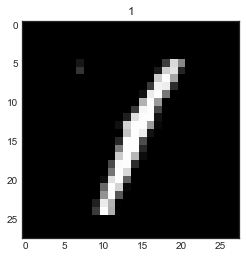

In [187]:
plt.title(label)
plt.imshow(image,'gray')
plt.show()

In [188]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [189]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [190]:
layer = nn.Conv2d(1, 20, 5,1).to(torch.device('cpu'))
layer 

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [191]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [192]:
weight = weight.detach()

In [193]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

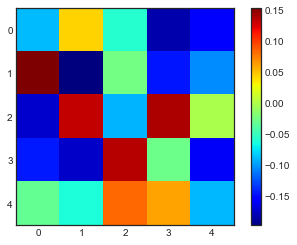

In [194]:
plt.imshow(weight[0,0,:,:], 'jet')
plt.colorbar()
plt.show()

In [195]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [196]:
input_image = torch.unsqueeze(images[0], dim=0)

In [197]:
output_data = layer(input_image)

In [198]:
output = output_data.data

In [199]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

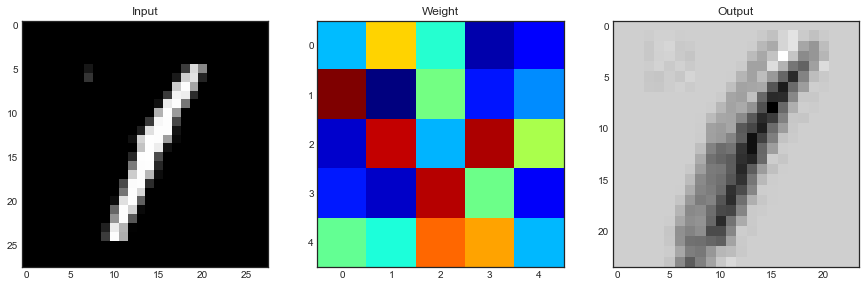

In [203]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title('Input')
plt.imshow(image,'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0, :, :], 'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:, :],'gray')
plt.show()

In [204]:
image.shape

(28, 28)

In [205]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

In [206]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

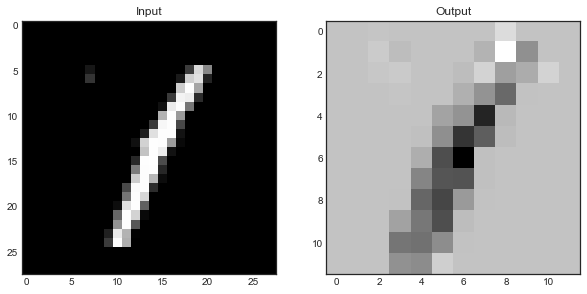

In [207]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0, :, :], 'gray')
plt.show()

In [208]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [209]:
flatten = image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [210]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [211]:
lin

tensor([[-0.6043, -0.2074,  0.1537,  0.4916, -0.0698,  0.9326, -0.2722,  0.3328,
          0.3076,  0.7542]], grad_fn=<AddmmBackward0>)

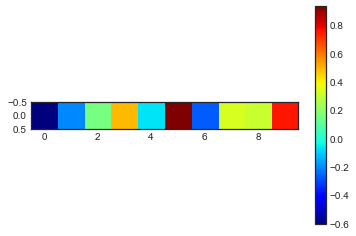

In [212]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

In [214]:
with torch.no_grad():
    flatten = image.view(1, 28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax=F.softmax(lin, dim=1)

In [215]:
softmax

tensor([[0.0840, 0.1360, 0.1010, 0.0752, 0.0940, 0.0869, 0.1299, 0.1048, 0.0933,
         0.0949]])

In [216]:
np.sum(softmax.numpy())

1.0000001

In [217]:
inputs = torch.randn( 4,3,28,28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [219]:
layer = nn.Conv2d(3, 20,5,1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

In [225]:

# import torchvision.models as model
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
# optimizer = optim.SGD(model.parameters(), lr=0.001)

AttributeError: module 'torchvision.models' has no attribute 'parameters'